<div>
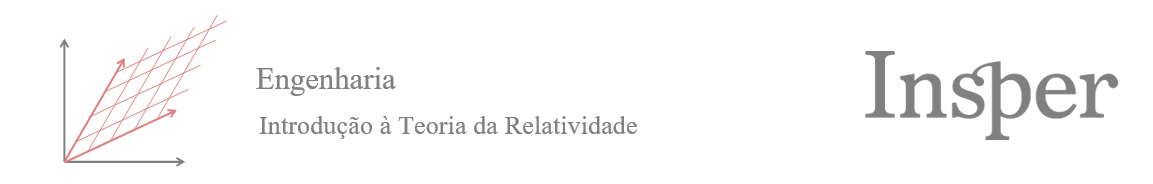
</div>



# Aula 13 - Diagramas de Minkowski em Python #


Nesta aula, vamos exercitar o que aprendemos na aula 12, calculando numericamente algumas transformações entre referenciais e representando-as no diagrama de Minkowski. Siga os itens e peça ajuda ao professor quando precisar.


**1.** Importe os módulos necessários executando a célula a seguir

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

Considere o exemplo que utilizamos na aula passada: um observador em uma nave (observador B) viaja com velocidade $v$ para a direita em relação ao observador A, conforme a figura. 


<div>
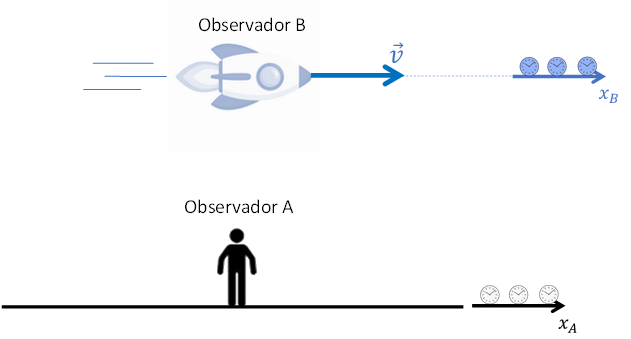
</div>

**2.** Vamos começar implementando funções que calculam as transformações de Lorentz de $(x_A,t_A)$ para $(x_B,t_B)$, assim como de $(x_B, t_B)$ para $(x_A, t_A)$. Você vai construir 5 funções:

- Função 'gama(v)': essa função recebe como parâmetro a velocidade relativa entre os referenciais e retorna o parâmetro $\gamma$.
- Função 'xa(xb,tb,v)': essa função recebe como parâmetros xb, tb e v, e retorna o valor de xa conforme a transformação de Lorentz.
- Função 'ta(xb,tb,v)': essa função recebe como parâmetros xb, tb e v, e retorna o valor de ta conforme a transformação de Lorentz.
- Função 'xb(xa,ta,v)': essa função recebe como parâmetros xa, ta e v, e retorna o valor de xb conforme a transformação de Lorentz.
- Função 'tb(xa,ta,v)': essa função recebe como parâmetros xa, ta e v, e retorna o valor de tb conforme a transformação de Lorentz.

Lembre-se que estamos adotando como unidades:

- Velocidade: $[sluz]$, assim, a velocidade da luz será $c = 1 [luz]$;
- Distância: $[sluz]$
- Tempo: $[s]$



In [2]:
#função gama
def gama(v):
    return 1/sqrt(1-v**2)

#Dados xb e tb, calcula xa
def xa(xb,tb,v):
    return gama(v)*(xb+v*tb)

#Dados xb e tb, calcula ta
def ta(xb,tb,v):
    return gama(v)*(tb+v*xb)

#Dados xa e ta, calcula xb
def xb(xa,ta,v):
    return gama(v)*(xa-v*ta)

#Dados xa e ta, calcula tb
def tb(xa,ta,v):
    return gama(v)*(ta-v*xa)


**3.** Crie duas listas, uma para pontos XB e outra para pontos TB, ambas com 6 pontos cada uma, de 1 em 1 unidade. Para isso, use a função "np.arange(0,6,1)".

In [3]:
XB=list(np.arange(0,6,1))
TB=list(np.arange(0,6,1))

**4.** A partir dos pontos criados, construa os eixos $ctB$ e $xB$ para uma velocidade relativa $v=0,5c$. Plote o gráfico dos eixos e varie a velocidade $v$. Verifique o que acontece quando a velocidade aumenta.

Observação: para plotar cada eixo, você vai precisar de duas listas, uma para ordenadas e outra para abscissas. A característica dos eixos $ctB$ e $xB$ é que o eixo $ctB$ é o lugar geométrico onde todas as coordenadas $xB$ são **nulas**. Por sua vez, o eixo $xB$ é o lugar geométrico onde todas as coordenadas $tB$ são **nulas**.

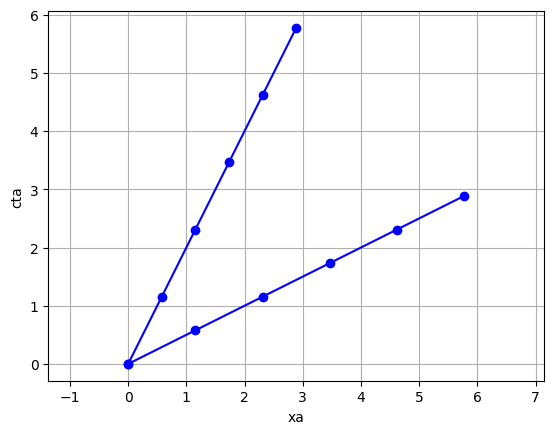

In [5]:
v=0.5
#Eixo ctB é construído quando todos os valores de xB são nulos
CTB_X=[xa(0, TB[i], v) for i in range(0,len(TB))]
CTB_Y=[ta(0, TB[i], v) for i in range(0,len(TB))]


#Eixo xB é construído quando todos os valores de tB são nulos
XB_X=[xa(XB[i], 0, v) for i in range(0,len(TB))]
XB_Y=[ta(XB[i], 0, v) for i in range(0,len(TB))]

plt.plot(CTB_X,CTB_Y, 'b-o')
plt.plot(XB_X,XB_Y, 'b-o')
plt.grid()
plt.axis('equal')
plt.xlabel("xa")
plt.ylabel("cta")
plt.show()

**5.** Vamos agora plotar um evento de coordenadas $(x_A=4,t_A=3)$. Para esse evento, usando as transformações de Lorentz, calcule $(x_B, t_B)$. Seria possível localizar as coordenadas $(x_B, t_B)$ nos eixos $xB$ e $ctB$ utilizando-se de retas paralelas a esses eixos. Plote-as em outra cor e interprete a representação do evento em ambos os referenciais.

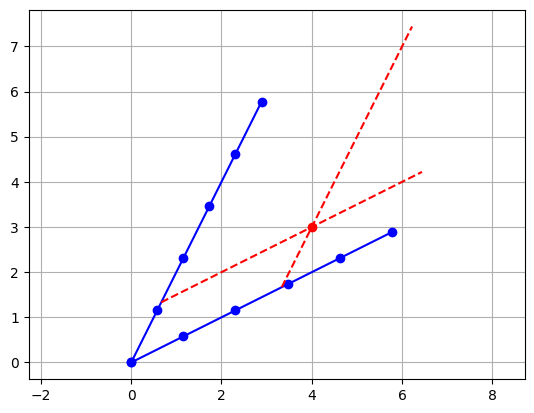

2.886751345948129 1.1547005383792517


In [6]:
#Evento
xAE=4
tAE=3

xBE=xb(xAE, tAE,v)
tBE=tb(xAE, tAE,v)

TE_X=[xa(xBE, TB[i], v) for i in range(0,len(TB))]
TE_Y=[ta(xBE, TB[i], v) for i in range(0,len(TB))]


#Eixo xB é construído quando todos os valores de tB são nulos
XE_X=[xa(XB[i], tBE, v) for i in range(0,len(TB))]
XE_Y=[ta(XB[i], tBE, v) for i in range(0,len(TB))]

plt.plot(CTB_X,CTB_Y, 'b-o')
plt.plot(XB_X,XB_Y, 'b-o')

plt.plot(TE_X,TE_Y, 'r--')
plt.plot(XE_X,XE_Y, 'r--')

plt.plot(xAE, tAE, 'ro')

plt.grid()
plt.axis('equal')
plt.show()



print(xBE, tBE)


**6.** Vamos considerar agora uma barra de comprimento próprio $1 sl$ localizada no referencial B, entre os pontos $X_B1=1$ e $X_B2=2$. Como estamos querendo representar a barra em um instante, como em uma fotografia, vamos considerar que ambas as extremidades são localizadas no instante $t_B=0$.

a) Represente graficamente a barra no referencial B;

b) Represente graficamente a barra no referencial A, escolhendo um instante $t_A$ qualquer. Mostre que houve contração do espaço;

comprimento segundo B: 1
comprimento segundo A: 0.8660254037844382
0.8660254037844382
0.8660254037844385


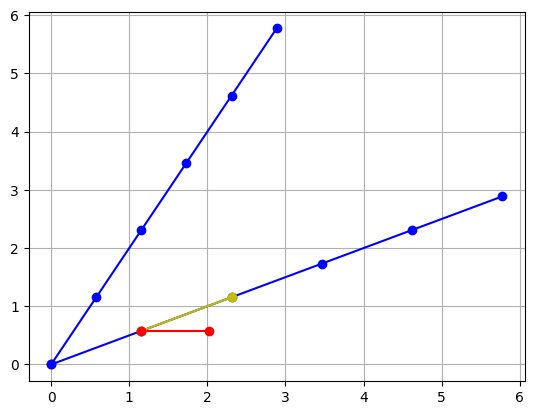

In [7]:
# comprimento de uma barra
xB1_barra=1
xB2_barra=2

xA1_barra=xa(xB1_barra, 0, v)
tA1_barra=ta(xB1_barra, 0, v)

xA2_barra=xa(xB2_barra, 0, v)
tA2_barra=ta(xB2_barra, 0, v)

#medindo o comprimento da barra no referencial A em tA1
xA1sinc=xA1_barra
xA2sinc=xB2_barra/gama(v)+v*tA1_barra

plt.grid(True)

plt.plot(CTB_X,CTB_Y, 'b-o')
plt.plot(XB_X,XB_Y, 'b-o')
plt.plot([xA1_barra, xA2_barra], [tA1_barra, tA2_barra], 'yo-')
plt.plot([xA1sinc, xA2sinc], [tA1_barra, tA1_barra], 'ro-')

L0=xB2_barra-xB1_barra
L=xA2sinc-xA1sinc

print("comprimento segundo B:", L0)
print("comprimento segundo A:", L)
print(L/L0)
print(1/gama(v))

**7.** Execute o código abaixo e tente interpretar o que ele significa. Observe o que acontece com as escalas dos eixos $x_B$ e $ct_B$ à medida que a velocidade $v$ aumenta.

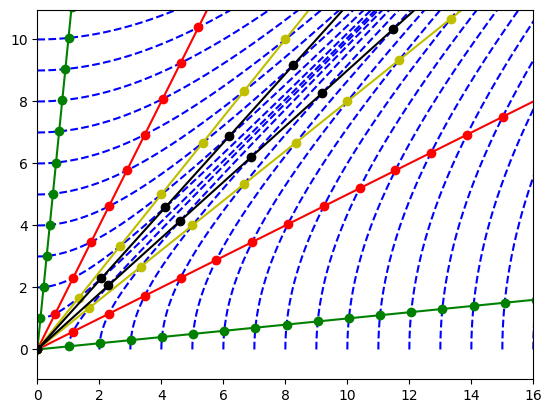

In [8]:
N=21

def spacetime(v):
    #lista de valores de xb, de 1 em 1
    Xb=list(np.arange(0,N,1))
    Tb=list(np.arange(0,N,1))
    #lista de valores de tb zerados, pois queremos plotar o eixo xb visto por A
    Tb0=[0]*len(Xb)
    Xb0=[0]*len(Xb)
    Xbx=[]
    Xbt=[]
    Tbx=[]
    Tbt=[]
    for i in range(0,len(Xb)):
        Xbx.append(xa(Xb[i], Tb0[i], v))
        Xbt.append(ta(Xb[i], Tb0[i], v))
        Tbx.append(xa(Xb0[i], Tb[i], v))
        Tbt.append(ta(Xb0[i], Tb[i], v))
    return Xbx, Xbt, Tbx, Tbt

lisV=np.arange(0,1,0.001)

for i in range(0,N):
    linhaXbx=[]
    linhaTbx=[]
    linhaXbt=[]
    linhaTbt=[]
    for v in lisV:
        Xbx, Xbt, Tbx, Tbt = spacetime(v)        
        linhaXbx.append(Xbx[i])
        linhaTbx.append(Tbx[i])
        linhaXbt.append(Xbt[i])
        linhaTbt.append(Tbt[i])
    
    plt.plot(linhaXbx, linhaTbx, 'b--')
    plt.plot(linhaXbt, linhaTbt, 'b--')

Xbx, Xbt, Tbx, Tbt = spacetime(0.5)    
plt.plot(Xbx, Xbt, 'r-o')
plt.plot(Tbx, Tbt, 'r-o')    

Xbx, Xbt, Tbx, Tbt = spacetime(0.1)    
plt.plot(Xbx, Xbt, 'g-o')
plt.plot(Tbx, Tbt, 'g-o')    

Xbx, Xbt, Tbx, Tbt = spacetime(0.8)    
plt.plot(Xbx, Xbt, 'y-o')
plt.plot(Tbx, Tbt, 'y-o')   

Xbx, Xbt, Tbx, Tbt = spacetime(0.9)    
plt.plot(Xbx, Xbt, 'k-o')
plt.plot(Tbx, Tbt, 'k-o')   
    
    
plt.axis('equal')
plt.axis([0,16,0,10])
plt.show()